# 1 Check the address of IPs

In [1]:
# from pynq import Overlay
# Overlay("fir.bit").ip_dict

# 2 Download the bitstream

In [2]:
from pynq import PL
from pynq import Overlay 
ol = Overlay("fir.bit")
ol.download()

# 3 Map the mermory of FIR IP

In [3]:
from pynq import MMIO
adder_ip = MMIO(0x43C60000,0x10000)

# 4 Read the datas from "data_in.bat" and "fir_coef.dat"

In [4]:
data_in = list()
fp = open("data_in.dat", "r")
data_in = fp.readlines()
fp.close()
in_N = len(data_in)
# print(in_N)
# print(data_in)

data_coef = list()
fp = open("fir_coef.dat", "r")
data_coef = fp.readlines()
fp.close()
coef_N = len(data_coef)
# print(hex(coef_N))
# print(data_coef)


# 5 Write the datas to FIR IP

In [5]:
in_addr = 0x800
coef_addr = 0x4000
offset_addr = 0x04
for i in range(0, in_N, 2):
#     print(i)
    data_L = int(data_in[i]) + 500
    data_H = int(data_in[i+1]) + 500
    data_in_reg = (data_H << 16) | data_L
    adder_ip.write(in_addr,data_in_reg)
#     op1 = adder_ip.read(in_addr)
    in_addr = in_addr + offset_addr
#     print(hex(data_L))
#     print(hex(data_H))
#     print(hex(op1))
for i in range(0, coef_N-1, 2):  
    data_L = int(data_coef[i]) + 100
    data_H = int(data_coef[i+1]) + 100
    data_coef_reg = (data_H << 16) | data_L
    adder_ip.write(coef_addr,data_coef_reg)
#     op1 = adder_ip.read(coef_addr)
    coef_addr = coef_addr + offset_addr 
#     print(hex(data_L))
#     print(hex(data_H))
#     print(hex(op1))

# 6 Read the result from FIR IP

In [6]:
result_addr = 0x2000
out_N = in_N + coef_N - 1
data_out = list()
fp = open("data_out_py.dat", "w")
for i in range(out_N):
    result = adder_ip.read(result_addr)
    fp.write(str(result) + '\n')
    data_out.append(result)
    result_addr = result_addr + offset_addr
fp.close()
# print(data_out)

# 7 Plot the result 

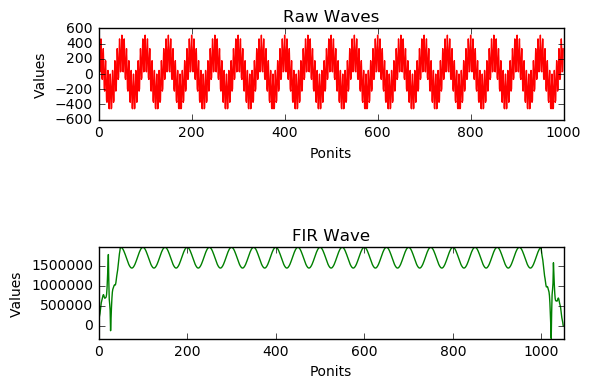

In [16]:
from pylab import *
subplot(3,1,1)
plot(data_in, 'r')
title('Raw Waves')
xlabel('Ponits')
ylabel('Values')
subplot(3,1,3)
plot(data_out, 'g')
axis([0, out_N, min(data_out), max(data_out)])
title('FIR Wave')
xlabel('Ponits')
ylabel('Values')
show()